# Лабораторная работа №1
## Выполнил Буканов Н.К ПМ-21М

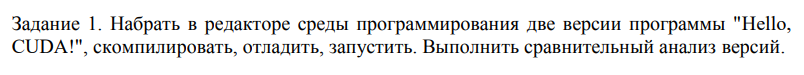

## Программа 1
```c++
#include "cuda.h"
#include <cstdio>
int main() {
    printf ("Hello, CUDA!\n");
    return 0;
}
```

In [6]:
# Это вызов консольной команды, результат вставляется прямо в фаил
! ../cmake-build-debug/lab1_1

Hello, CUDA!


## Программа 2

```c++
#include <cstdio>

__global__ void kernel()
{}

int main()
{
    kernel<<<1, 1>>>();
    printf ("Hello, CUDA!\n");
    return 0;
}
```

In [5]:
! ../cmake-build-debug/lab1_2

Hello, CUDA!


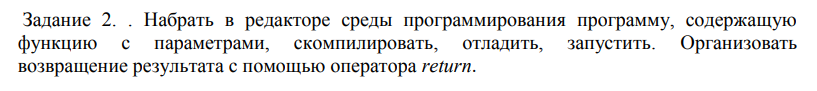

```c++
#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <cstdio>

static void HandleError( cudaError_t err, const char *file, int line )
{
    if (err != cudaSuccess)
    {
        printf("%s in %s at line %d\n", cudaGetErrorString(err), file, line);
        exit( EXIT_FAILURE );
    }
}
#define HANDLE_ERROR( err ) (HandleError( err, __FILE__, __LINE__ ))
__device__ int  add(int a, int b)
{
  return a + b;
}

__global__ void kernel(int a, int b, int* c)
{
   int q = add(a,b);
   *c = q;
}

int main()
{ 
    int c;
    int *dev_c;
    HANDLE_ERROR (cudaMalloc((void**)&dev_c, sizeof(int)));
    kernel<<<1, 1>>>(2, 7, dev_c);
    HANDLE_ERROR (cudaMemcpy(&c, dev_c, sizeof(int), cudaMemcpyDeviceToHost));
    printf ("2 + 7 = %d\n", c);
    cudaFree(dev_c);
    return 0;
}
```


In [8]:
! ../cmake-build-debug/lab1_3

2 + 7 = 9


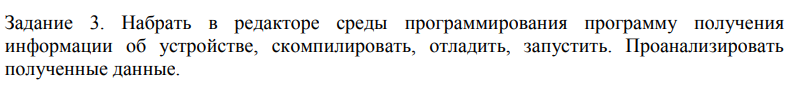

```c++
#include <cstdio>
int main (int argc, char * argv [] )
{
    int deviceCount;
    cudaDeviceProp devProp{};
    cudaGetDeviceCount ( &deviceCount );
    printf ( "Found %d devices\n", deviceCount );
    for ( int device = 0; device < deviceCount; device++) {
        cudaGetDeviceProperties ( &devProp, device );
        printf ("Device %d\n", device );
        printf ("Compute capability : %d.%d\n", devProp.major, devProp.minor);
        printf ("Name : %s\n", devProp.name);
        // Полный объем глобальной памяти в Mбайтах:
        printf ("Total Global Mem: %lu\n", (devProp.totalGlobalMem/(1024*1024)));
        printf ("Shared memory per block: %zu\n" , devProp.sharedMemPerBlock );
        printf ("Registers per block : %d\n", devProp.regsPerBlock);
        printf ("Warp size : %d\n", devProp.warpSize);
        printf ("Max threads per block: %d\n", devProp.maxThreadsPerBlock);
        printf ("Total constant memory: %zu\n", devProp.totalConstMem);
        printf ("Clock Rate : %d\n", devProp.clockRate);
        printf ("Texture Alignment : %zu\n", devProp.textureAlignment);
        printf ("Device Overlap : %d\n", devProp.deviceOverlap);
        printf ("Multiprocessor Count: %d\n", devProp.multiProcessorCount);
        printf ("Max Threads Dim : %d %d %d\n", devProp.maxThreadsDim[0],
                devProp.maxThreadsDim[1], devProp.maxThreadsDim[2] );
        printf ("Max Grid Size : %d %d %d\n", devProp.maxGridSize [0],
                devProp.maxGridSize [1], devProp.maxGridSize [2]);
        printf("")
    }
    return 0;
}
```

In [10]:
! ../cmake-build-debug/lab1_4

Found 1 devices
Device 0
Compute capability : 6.1
Name : GeForce GTX 1080 Ti
Total Global Mem: 11264
Shared memory per block: 49152
Registers per block : 65536
Warp size : 32
Max threads per block: 1024
Total constant memory: 65536
Clock Rate : 1708500
Texture Alignment : 512
Device Overlap : 1
Multiprocessor Count: 28
Max Threads Dim : 1024 1024 64
Max Grid Size : 2147483647 65535 65535
